K-Mean Clustering

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = sns.load_dataset("titanic")

In [28]:
# model

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import the data in features
X = df[["age", "fare"]]
X.age.fillna(value = X['age'].mean(), inplace=True)


# Scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform clustering
model = KMeans(n_clusters=5)
model.fit(X_scaled)

# assign cluster to data
df["cluster"]= model.labels_


C:\Users\qadir\AppData\Local\Temp\ipykernel_2832\1335061911.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,4
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,4
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,4


In [30]:
df["cluster"].value_counts()

4    447
0    207
1    129
3     88
2     20
Name: cluster, dtype: int64

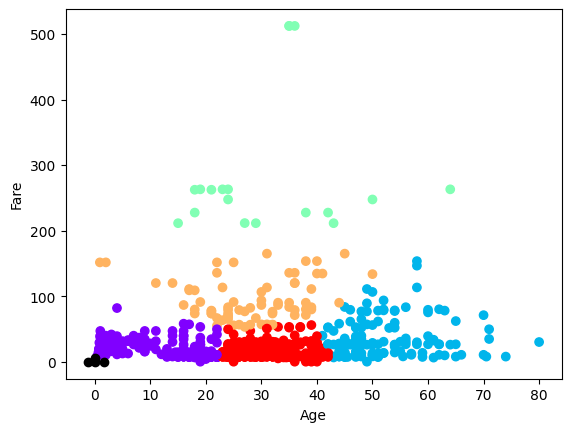

In [31]:
plt.scatter(df["age"], df["fare"],c= df["cluster"], cmap= "rainbow")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color= "black")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()
 

In [32]:
import plotly.express as px
fig = px.scatter(df, x = "age", y = "fare", color = "cluster")
fig.show()

In [33]:
import plotly.express as px
fig = px.scatter_3d(df, x = "age", y = "fare",z= "pclass",color="cluster")
fig.show()

In [34]:
fig = px.parallel_coordinates(df,color="cluster", title= "titanic Clusters")
fig.show

c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



<bound method BaseFigure.show of Figure({
    'data': [{'dimensions': [{'label': 'survived',
                              'values': array([0, 1, 1, ..., 0, 1, 0], dtype=int64)},
                             {'label': 'pclass',
                              'values': array([3, 1, 3, ..., 3, 1, 3], dtype=int64)},
                             {'label': 'age',
                              'values': array([22., 38., 26., ..., nan, 26., 32.])},
                             {'label': 'sibsp',
                              'values': array([1, 1, 0, ..., 1, 0, 0], dtype=int64)},
                             {'label': 'parch',
                              'values': array([0, 0, 0, ..., 2, 0, 0], dtype=int64)},
                             {'label': 'fare',
                              'values': array([ 7.25  , 71.2833,  7.925 , ..., 23.45  , 30.    ,  7.75  ])},
                             {'label': 'cluster',
                              'values': array([0, 3, 4, ..., 4, 4, 4])}],
       

In [35]:



pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# saving the model
import joblib
joblib.dump(model,"KMeansClustering.joblib")

['KMeansClustering.joblib']

In [37]:
# load the saved model
model_loaded = joblib.load("KMeansClustering.joblib")

In [38]:
import seaborn as sns
df_1 = sns.load_dataset("tips")

In [39]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1["smoker"])
df_1["smoker"] = le.transform(df_1["smoker"])

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1["time"])
df_1["time"] = le.transform(df_1["time"])

In [42]:

le = LabelEncoder()
le.fit(df_1["day"])
df_1["day"] = le.transform(df_1["day"])

In [43]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [44]:
X =df_1.drop(columns=["sex"])
y = df_1["sex"]

In [45]:
X.head()


,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1["time"])
df_1["time"] = le.transform(df_1["time"])

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1["smoker"])
df_1["smoker"] = le.transform(df_1["smoker"])

In [48]:
df_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4


In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X,y)

In [25]:
# saving the model
import joblib
joblib.dump(model,"tipswalamodel.joblib")

['tipswalamodel.joblib']

In [70]:
model_1 = joblib.load("tipswalamodel.joblib")

In [77]:
import pickle
# save th model
with open("model.pk1", "wb")as f:
    pickle.dump(model,f)
#load the model
with open("model.pk1","rb") as f:
    loaded_model = pickle.load(f)